# Latent Space Visualization

Visualize the derived latent space on validation data. 

In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import sys
sys.path.insert(0, '..')
import tcr_embedding as tcr
import scanpy as sc
import json
from matplotlib import rcParams
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [25]:
path_data = '../data/10x_CD8TC/v5_train_val_test.h5ad'
data_full = sc.read_h5ad(path_data)
data_full = data_full[data_full.obs['set'] != 'test']


high_antigen_count = ['A0201_ELAGIGILTV_MART-1_Cancer_binder',
                        'A0201_GILGFVFTL_Flu-MP_Influenza_binder',
                        'A0201_GLCTLVAML_BMLF1_EBV_binder',
                        'A0301_KLGGALQAK_IE-1_CMV_binder',
                        'A0301_RLRAEAQVK_EMNA-3A_EBV_binder',
                        'A1101_IVTDFSVIK_EBNA-3B_EBV_binder',
                        'A1101_AVFDRKSDAK_EBNA-3B_EBV_binder',
                        'B0801_RAKFKQLL_BZLF1_EBV_binder']

data_full.obs['binding_name'][~data_full.obs['binding_name'].isin(high_antigen_count)] = 'no_data'

data_train = data_full[data_full.obs['set'] == 'train']
data_train.obs['binding_name'][~data_train.obs['binding_name'].isin(high_antigen_count)] = 'no_data'
data_val = data_full[data_full.obs['set'] == 'val']
data_val.obs['binding_name'][~data_val.obs['binding_name'].isin(high_antigen_count)] = 'no_data'

data_val.obs['binding_name'].unique()
data_train.obs['binding_name'] = data_train.obs['binding_name'].astype(str)
data_val.obs['binding_name'] = data_val.obs['binding_name'].astype(str)

# Over all Donors

In [ ]:
rcParams['figure.figsize'] = (8, 8)
sc.pp.neighbors(data_val, use_rep='X')
sc.tl.umap(data_val)

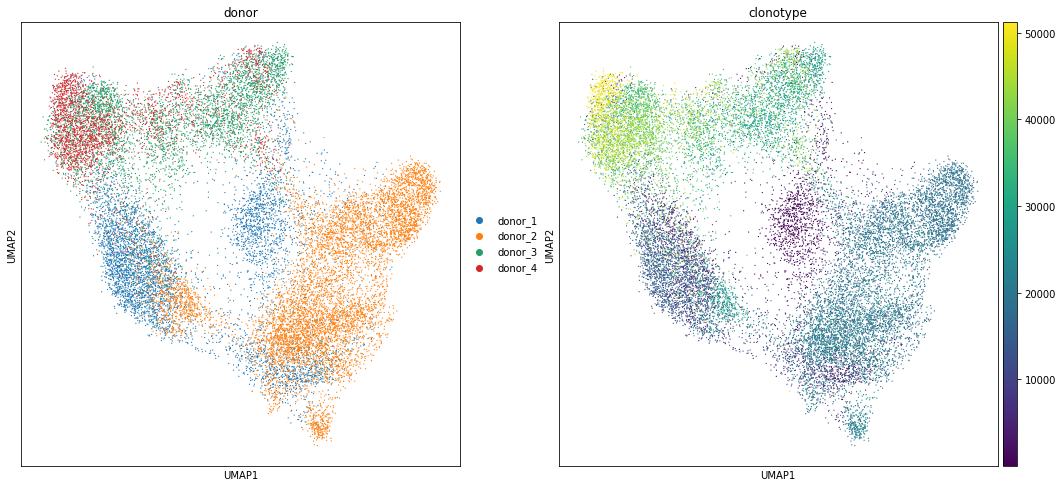

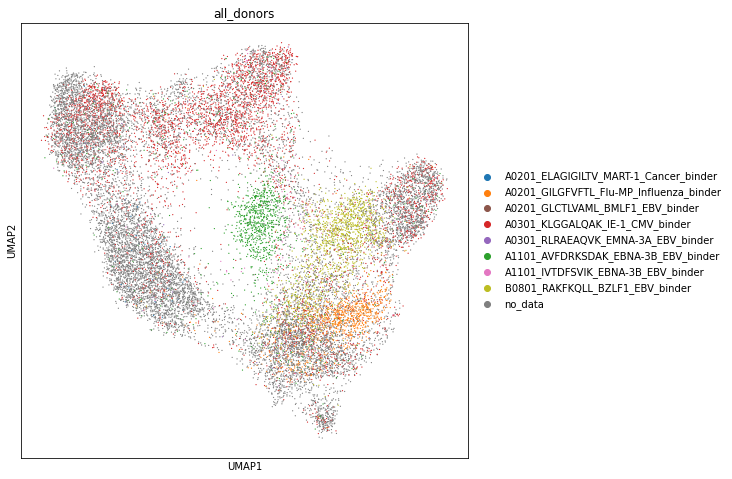

In [11]:
sc.pl.umap(data_val, color=['donor', 'clonotype'])
fig = sc.pl.umap(data_val, color='binding_name', palette=tcr.constants.ANTIGEN_COLORS, return_fig=True, title='all_donors')
fig.savefig('umap_all_donor.pdf', bbox_inches='tight')

In [ ]:
sc.tl.pca(data_val)

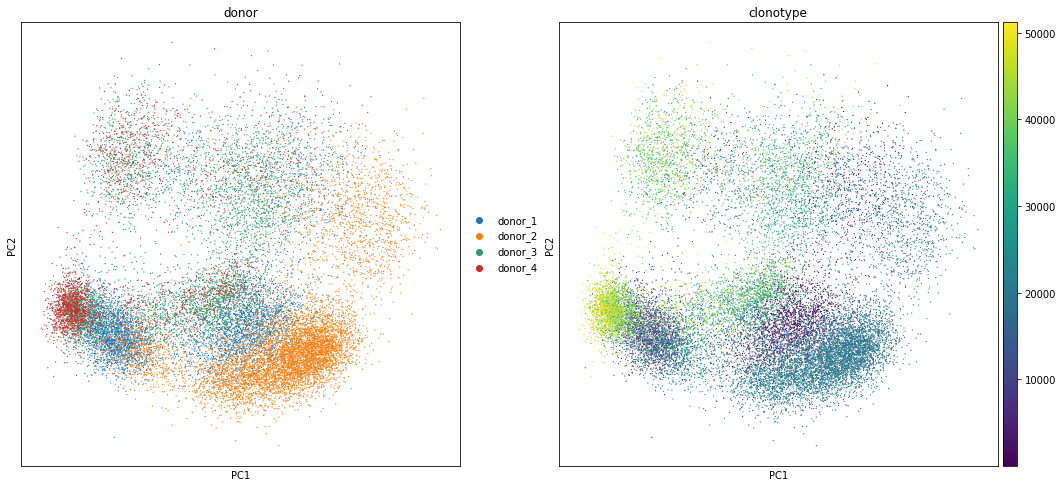

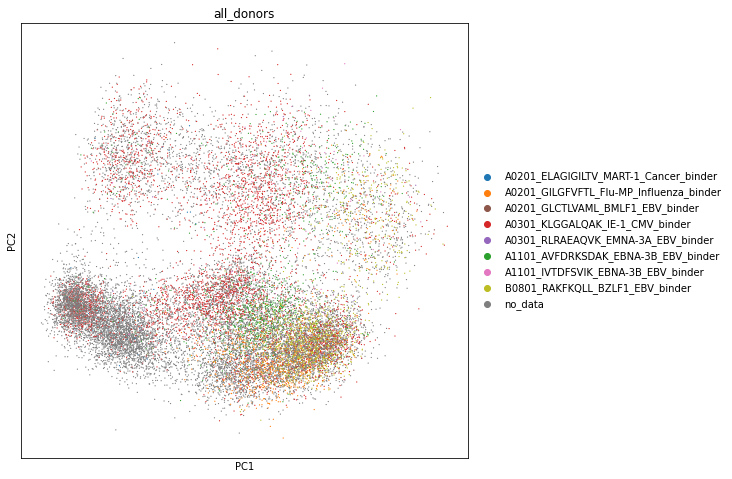

In [12]:
sc.pl.pca(data_val, color=['donor', 'clonotype'])
fig = sc.pl.pca(data_val, color='binding_name', palette=tcr.constants.ANTIGEN_COLORS, return_fig=True, title='all_donors')
fig.savefig('pca_all_donor.pdf', bbox_inches='tight')

In [ ]:
sc.tl.tsne(data_val)

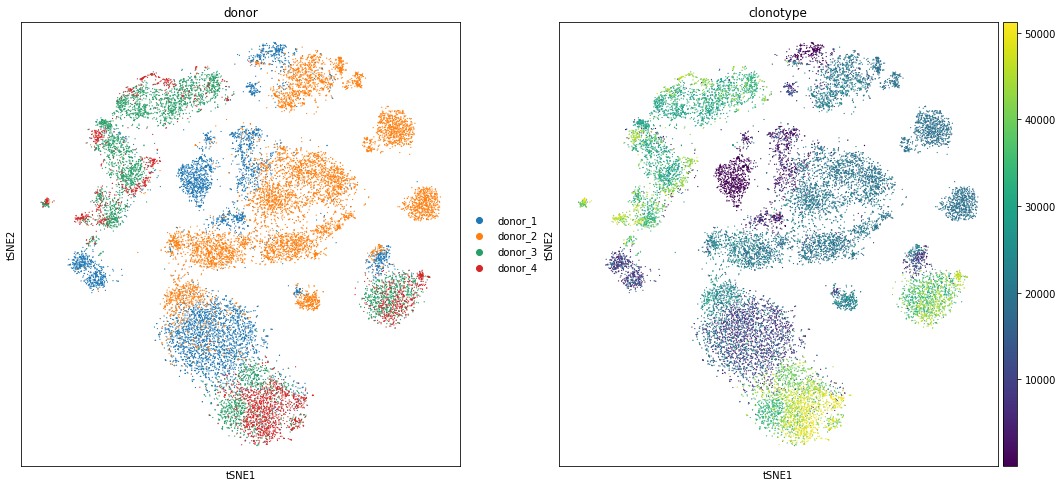

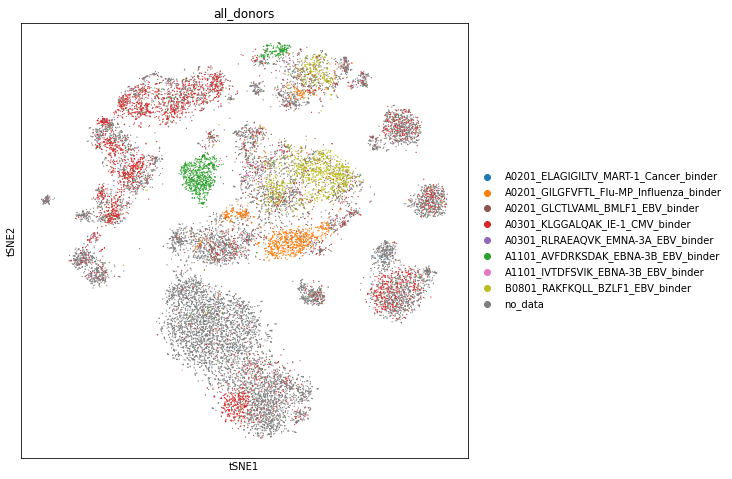

In [14]:
sc.pl.tsne(data_val, color=['donor', 'clonotype'])
fig = sc.pl.tsne(data_val, color='binding_name', palette=tcr.constants.ANTIGEN_COLORS, return_fig=True, title='all_donors')
fig.savefig('tsne_all_donor.pdf', bbox_inches='tight')

# For Donor 1

In [ ]:
data_donor_1 = data_val[data_val.obs['donor'] == 'donor_1']
sc.pp.neighbors(data_val, use_rep='X')
sc.tl.umap(data_donor_1)

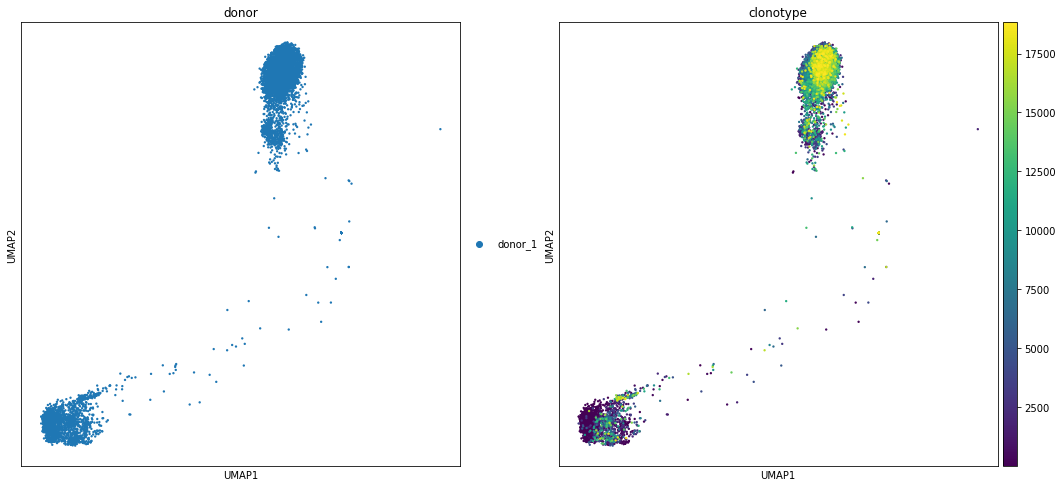

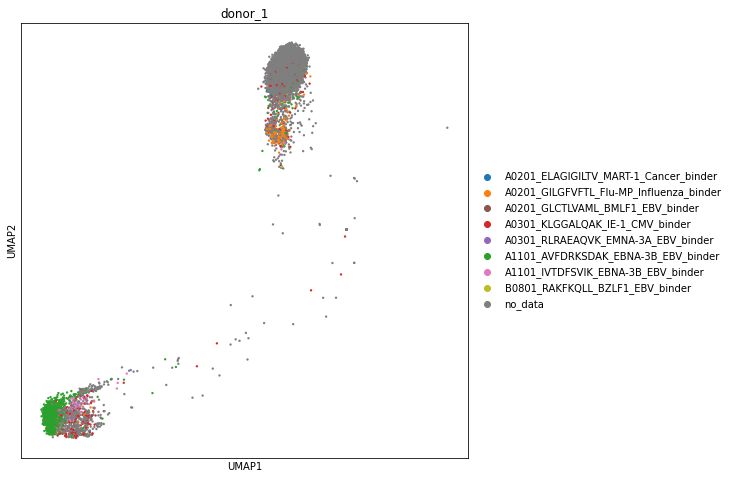

In [15]:
sc.pl.umap(data_donor_1, color=['donor', 'clonotype'])
fig = sc.pl.umap(data_donor_1, color='binding_name', palette=tcr.constants.ANTIGEN_COLORS, return_fig=True, title='donor_1')
fig.savefig('umap_donor_1.pdf', bbox_inches='tight')

In [ ]:
sc.tl.pca(data_donor_1)

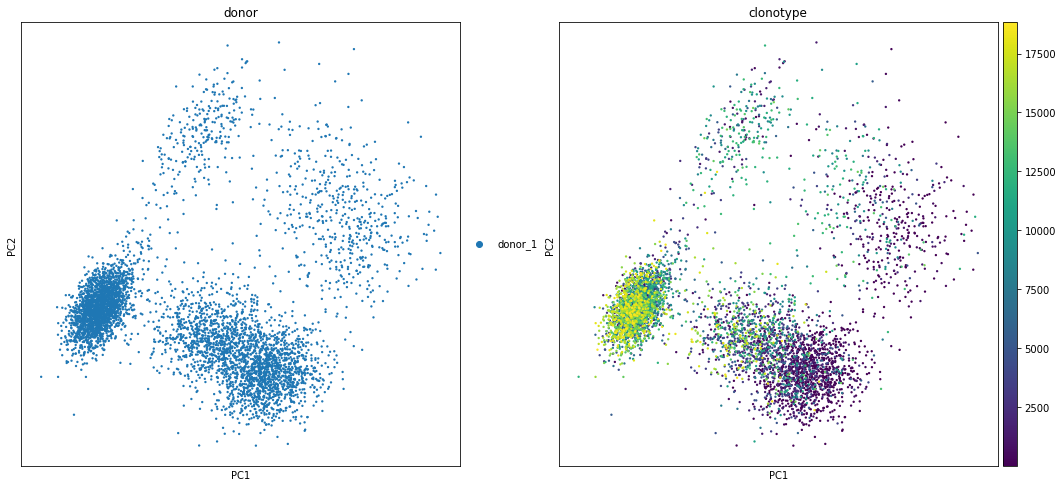

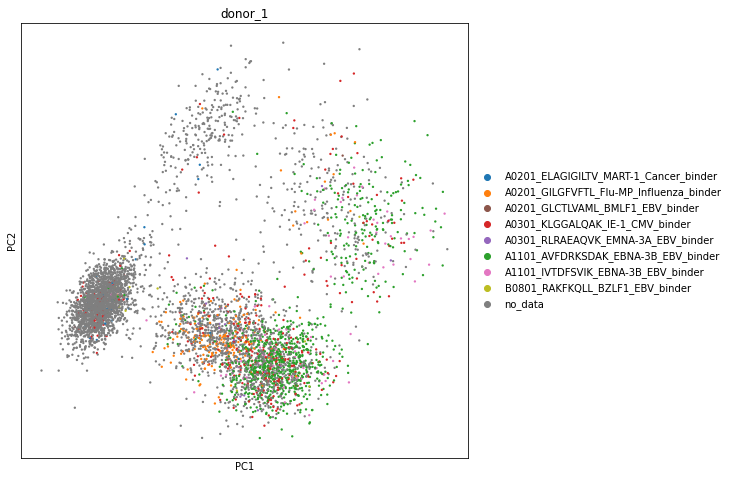

In [16]:
sc.pl.pca(data_donor_1, color=['donor', 'clonotype'])
fig = sc.pl.pca(data_donor_1, color='binding_name', palette=tcr.constants.ANTIGEN_COLORS, return_fig=True, title='donor_1')
fig.savefig('pca_donor_1.pdf', bbox_inches='tight')

In [ ]:
sc.tl.tsne(data_donor_1)

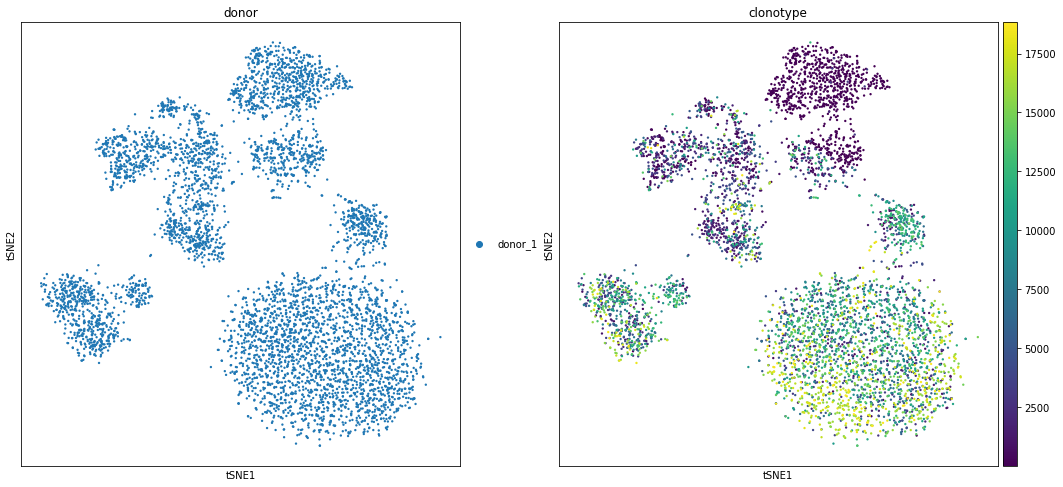

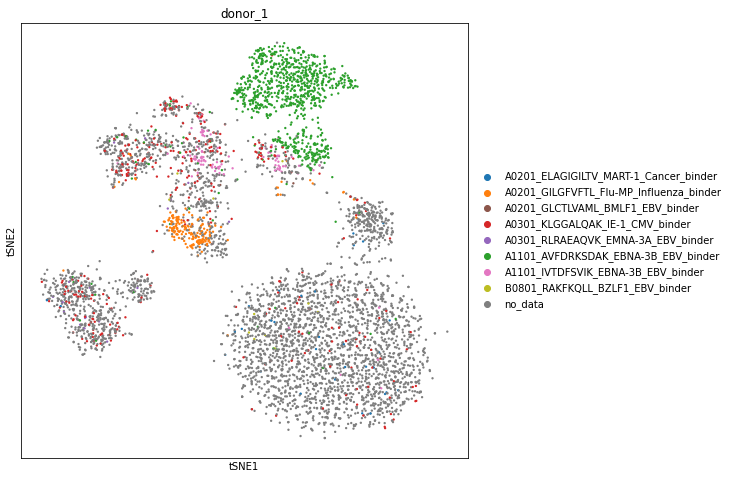

In [23]:
sc.pl.tsne(data_donor_1, color=['donor', 'clonotype'])
fig = sc.pl.tsne(data_donor_1, color='binding_name', palette=tcr.constants.ANTIGEN_COLORS, return_fig=True, title='donor_1')
fig.savefig('tsne_donor_1.pdf', bbox_inches='tight')

# Sanity check if preprocessing is wrong
Test the same on less preprocessed data

In [30]:
high_antigen_count = ['A0201_ELAGIGILTV_MART-1_Cancer_binder',
                        'A0201_GILGFVFTL_Flu-MP_Influenza_binder',
                        'A0201_GLCTLVAML_BMLF1_EBV_binder',
                        'A0301_KLGGALQAK_IE-1_CMV_binder',
                        'A0301_RLRAEAQVK_EMNA-3A_EBV_binder',
                        'A1101_IVTDFSVIK_EBNA-3B_EBV_binder',
                        'A1101_AVFDRKSDAK_EBNA-3B_EBV_binder',
                        'B0801_RAKFKQLL_BZLF1_EBV_binder']

In [31]:
path_data = '../data/10x_CD8TC/v5_train_val_test.h5ad'
v5 = sc.read_h5ad(path_data)
v5.shape

(128587, 5000)

In [32]:
path_data = '../data/10x_CD8TC/highly_var_5000.h5ad'
data_full = sc.read_h5ad(path_data)

In [33]:
data_full.shape

(178356, 19707)

In [34]:
# data_full = data_full.concatenate(v5)
# data_full = data_full[data_full.obs['set'] == 'val']

In [35]:
data_full = data_full[data_full.obs['A0201_ELAGIGILTV_MART-1_Cancer_binder'] != 'None']

In [36]:
mask = np.array([False]*data_full.shape[0])
mask[:30000] = True
np.random.shuffle(mask)

In [37]:
mask.sum()

30000

In [38]:
mask

array([False, False,  True, ..., False, False, False])

In [39]:
data_full = data_full[mask]
data_full.obs['donor'].value_counts()

donor_2    12553
donor_1     7067
donor_3     6149
donor_4     4231
Name: donor, dtype: int64

In [40]:
sc.pp.neighbors(data_full, use_rep='X')
sc.tl.umap(data_full)

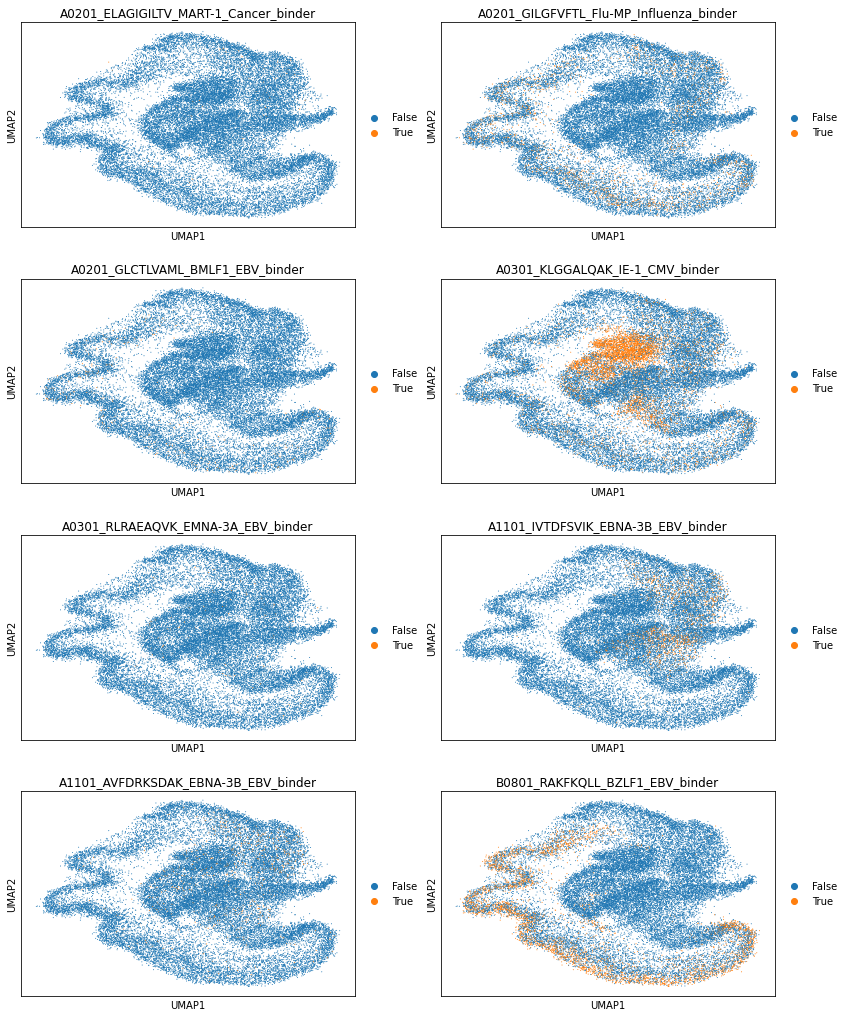

In [41]:
sc.pl.umap(data_full, color=high_antigen_count, ncols=2)

In [42]:
sc.tl.pca(data_full)

C:\Users\yanga\AppData\Local\Continuum\anaconda3\envs\tcr_update\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


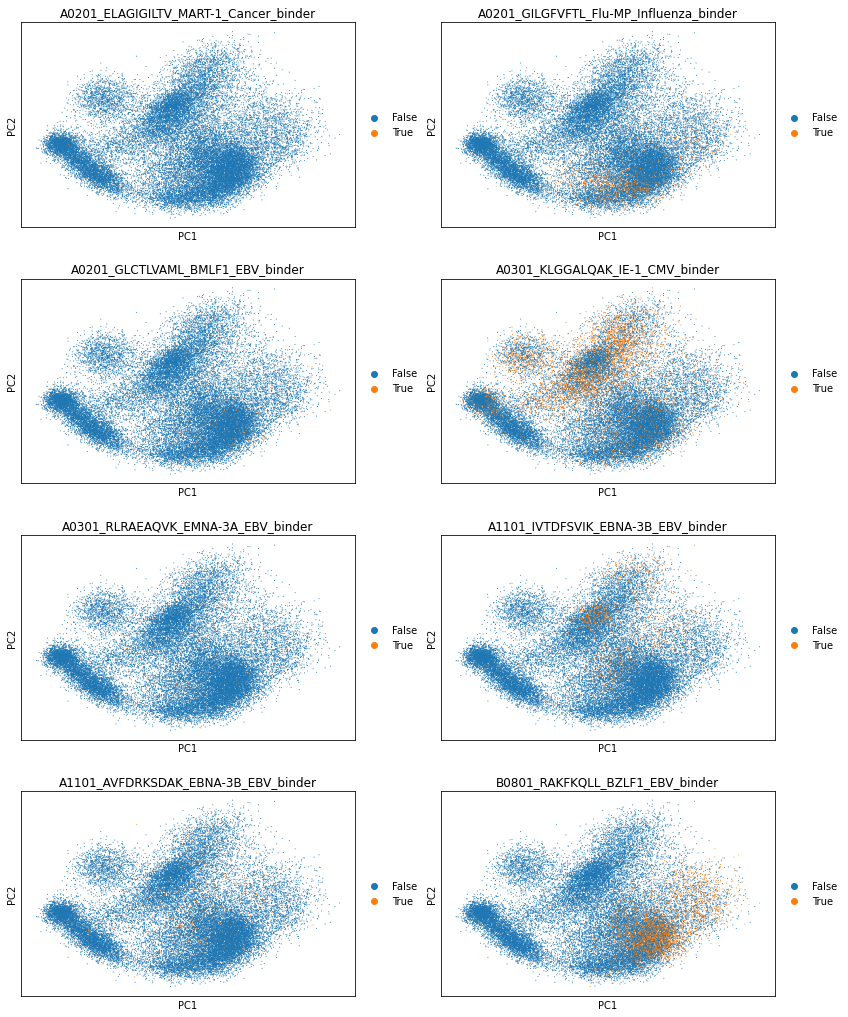

In [43]:
sc.pl.pca(data_full, color=high_antigen_count, ncols=2)

In [44]:
sc.tl.tsne(data_full, n_jobs=4)

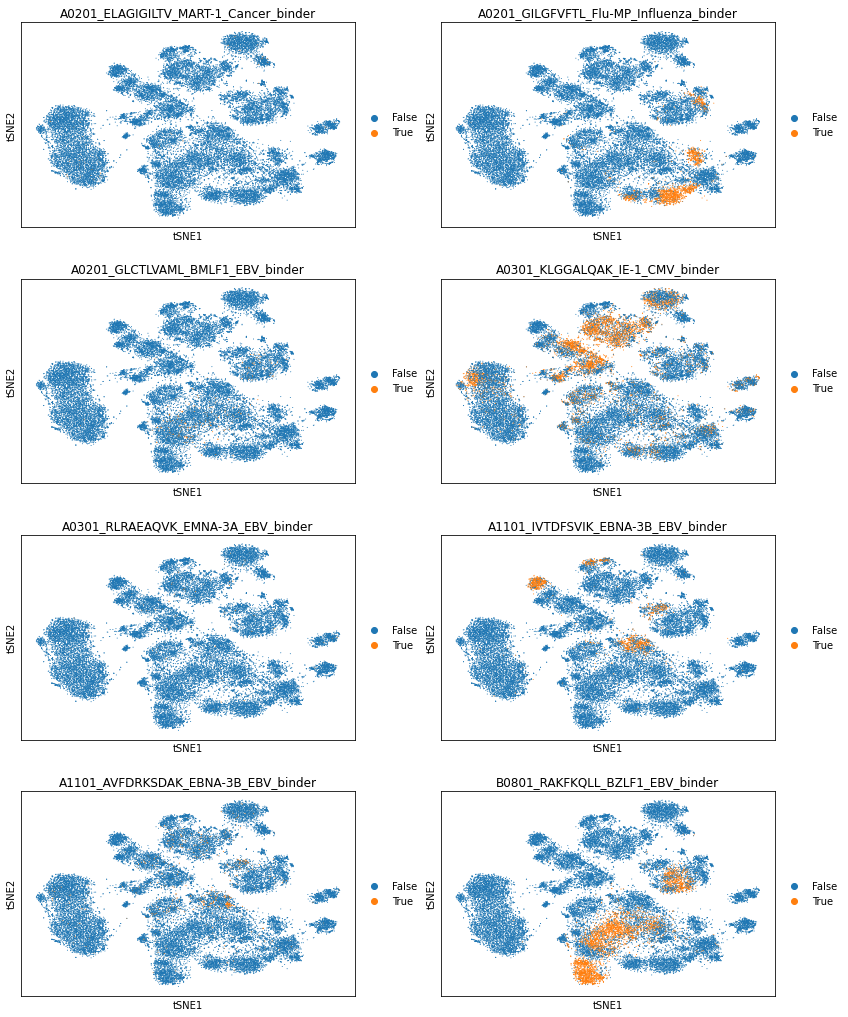

In [46]:
fig = sc.pl.tsne(data_full, color=high_antigen_count, ncols=2, return_fig=True)
fig.savefig('tsne_sanity_check_preprocessing.pdf')